<a href="https://colab.research.google.com/github/Fritz302/data-science/blob/main/FritK_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You would want to include a polynomial element to make the model more complex. Linear models lack the complexity that is needed to cover more diverse data sets, which is when polynomails are the most useful.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Polynomials tend to cause overfitting. Also, if you want a simpler, easier-to-read model you should not use polynomial elements.

**Task3**:

What's the point of using b splines?

The point of using b splines is to fit curves from polynomial models.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a complex statistical distribution that attempts to measure the probability of many different variables compared against each other.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
howelldata = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-is55sri7
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-is55sri7
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=c925899b460070d65f841c19f7e774ebf2c46c527c05e62ad54c3e46b7bf2592
  Stored in directory: /tmp/pip-ephem-wheel-cache-5qsrhk6f/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 9.3 MB/s eta 0:00:00
   ━

In [2]:
knots_amt = 6
knots = np.linspace(53.975,100, knots_amt+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howelldata, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


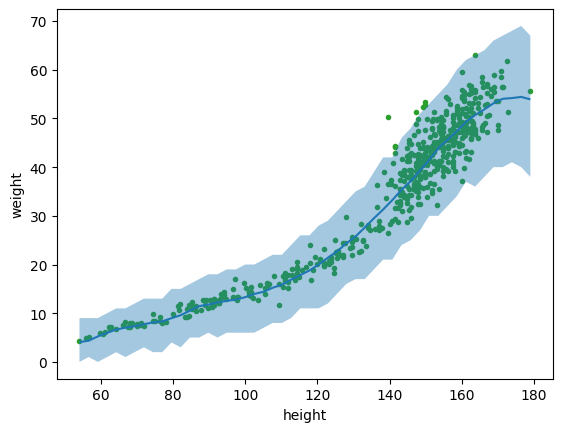

In [3]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps=True)
plt.plot(howelldata.height, howelldata.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that the linear algebra libraries used by Theano are multicore meaning when you run the code, you set the cores to only 1.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph was the pm.gp.util.plot_gp_dist graph. I liked how it was both informative and really visually appealing. The variance is really easy to spot and so are the data points.